# Titanic Project

### importacion de bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier



from xgboost import XGBClassifier
from xgboost import XGBRegressor


In [57]:
from sklearn.metrics import mean_absolute_error


In [2]:

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv("Datasets/titanic/train.csv")


In [4]:
data.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
data_test = pd.read_csv("Datasets/titanic/test.csv")
data_test.shape

(418, 11)

In [6]:
data_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
## verifio los valores nulos

In [9]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
pd.isnull(data_test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
columnsfeaturesa = data.drop(columns="Survived")

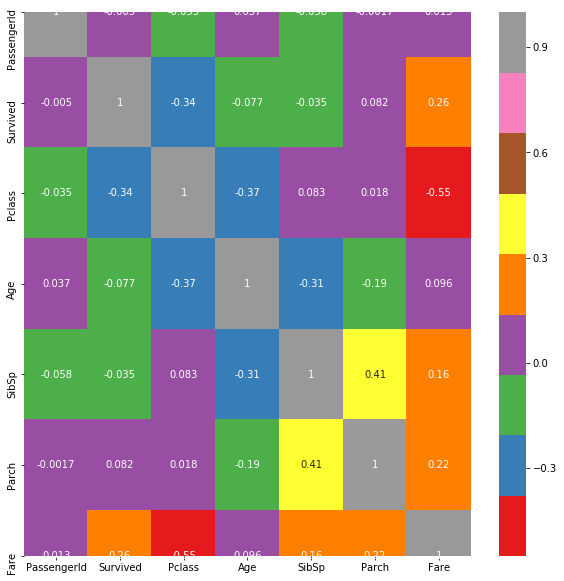

In [14]:
X = columnsfeaturesa
Y = data["Survived"]
cor = data.corr()
plt.figure(figsize=(10,10))

g = sns.heatmap(cor,annot=True,cmap="Set1")

## Data Wrangling

In [15]:
## Convierto la columna Hombre y mujer ,en 0 y 1

In [16]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [17]:
data["Sex"] = np.where(data["Sex"]== "male","0" , data["Sex"])
data["Sex"] = np.where(data["Sex"]== "female","1" , data["Sex"])

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data_test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [20]:
data_test["Sex"] = np.where(data_test["Sex"]== "male","0" , data_test["Sex"])
data_test["Sex"] = np.where(data_test["Sex"]== "female","1" , data_test["Sex"])

In [21]:
## Defino 3 rangos etarios , de 0 a 30 (joven), de 30 a 55 (adulto) , de 55 a 100 (viejo)

In [22]:
## cambio las letras de embarque por numeros

In [23]:
data["Embarked"].replace(["Q","S","C"], [0,1,2] ,inplace = True)
data_test["Embarked"].replace(["Q","S","C"], [0,1,2] ,inplace = True)

In [24]:
## Remplazo los datos de la edad por la media

In [25]:
promedio =  (data["Age"].mean() + data_test["Age"].mean())/2

In [26]:
data["Age"].replace(np.nan, promedio, inplace = True)

In [27]:
data_test["Age"].replace(np.nan, promedio, inplace = True)

In [28]:
pd.isnull(data["Age"]).sum()

0

In [29]:
pd.isnull(data_test["Age"]).sum()

0

In [30]:
#bandas de edad 

In [31]:
edades = [0 , 10 ,16 , 25 ,40 , 60 ,100 ]
nombres = [ "1", "2", "3", "4", "5", "6"]
data['Age'] = pd.cut(data['Age'], edades, labels = nombres)
data_test['Age'] = pd.cut(data_test['Age'], edades, labels = nombres)


In [32]:
data.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [33]:
data.drop(['Cabin'], axis = 1, inplace=True)
data_test.drop(['Cabin'], axis = 1, inplace=True)


In [34]:
 data = data.drop(["Name", "PassengerId", "Ticket" ], axis= 1)

In [35]:
# fare , SibSp

In [36]:
data_test =data_test.drop(["Name", "Ticket"], axis= 1)

In [37]:
data.dropna(axis=0, how='any', inplace=True)
data_test.dropna(axis=0, how='any', inplace=True)


In [38]:
print(pd.isnull(data).sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [39]:
print(pd.isnull(data_test).sum())


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [40]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,3,1,0,7.2500,1.0
1,1,1,1,4,1,0,71.2833,2.0
2,1,3,1,4,0,0,7.9250,1.0
3,1,1,1,4,1,0,53.1000,1.0
4,0,3,0,4,0,0,8.0500,1.0


In [41]:
data.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

## Implementacion del algoritmo de regreison Logistica

In [42]:
X  = np.array(data.drop(["Survived"],1))
Y  = np.array(data["Survived"])

In [43]:
X_train , X_test , Y_train ,Y_test = train_test_split(X, Y, test_size = 0.18)

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train , Y_train)

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
Y_pred = lr.predict(X_test)


In [47]:
print('Precisión Regresión Logística:')


Precisión Regresión Logística:


In [48]:
print(lr.score(X_train, Y_train))


0.8145604395604396


 ## Suport vector Machine

In [49]:
svc = SVC()
svc.fit(X_train,Y_train)

C:\Users\Tomas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
Y_predicta = svc.predict(X_test)

In [51]:
print("Presicion del modelo {}".format(svc.score(X_train , Y_train)))


Presicion del modelo 0.853021978021978


### XGBOOST

In [59]:
modelXGB = XGBRegressor(max_depth=2)
modelXGB.fit(X_train, Y_train)
predictionsXGB = modelXGB.predict(X_test)

maeXGB = mean_absolute_error(predictionsXGB, Y_test)
print("Mean Absolute Error:" , maeXGB)

Mean Absolute Error: 0.2736277741304836


## K-Vecinos

In [60]:
kn = KNeighborsClassifier(n_neighbors  =3 )
kn.fit(X_train ,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
print("Precision del modelo: %s" %(kn.score(X_train, Y_train)))

Precision del modelo: 0.8475274725274725


## Comparaacion con data_test

In [62]:
ids = data_test['PassengerId']


In [63]:
pred_lr = lr.predict(data_test.drop('PassengerId', axis=1))
out_lr = pd.DataFrame({ 'PassengerId' : ids, 'Survived': pred_lr })

In [64]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,4,0,0,7.8292,0
1,893,3,1,5,1,0,7.0000,1
2,894,2,0,6,0,0,9.6875,0
3,895,3,0,4,0,0,8.6625,1
4,896,3,1,3,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,4,0,0,8.0500,1
414,1306,1,1,4,0,0,108.9000,2
415,1307,3,0,4,0,0,7.2500,1
416,1308,3,0,4,0,0,8.0500,1


In [65]:
print("prediccion de la regression logistica : {}".format(out_lr.head()))

prediccion de la regression logistica :    PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [66]:
prediccion_svc = svc.predict(data_test.drop('PassengerId', axis=1))
out_svc = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_svc })
print('Predicción Soporte de Vectores:%s'%out_svc.head())


Predicción Soporte de Vectores:   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [67]:
prediccion_kn = kn.predict(data_test.drop('PassengerId', axis=1))
out_kn = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_kn })
print('Predicción Vecinos más Cercanos:')
out_kn.head()

Predicción Vecinos más Cercanos:


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
